# 📊 Step 2: Exploratory Data Analysis (EDA)

## Objective
Understand the Magnificent 7 stock data through statistical analysis and visualization.

### What we'll analyze:
1. **Basic Statistics** - Mean, std, min, max, percentiles
2. **Missing Values** - Data quality check
3. **Distributions** - Returns and price distributions
4. **Correlations** - Relationships between stocks
5. **Volatility** - Risk analysis
6. **Seasonality** - Time patterns
7. **Outliers** - Extreme events detection

---

## 2.1 Imports and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json
import warnings

warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


In [2]:
# Load configuration
with open('../data/raw/config.json', 'r') as f:
    config = json.load(f)

TICKERS = config['tickers']
MAGNIFICENT_7 = config['ticker_names']

print(f"📊 Project: {config['project']}")
print(f"📅 Period: {config['start_date']} to {config['end_date']}")
print(f"📈 Tickers: {TICKERS}")

📊 Project: Magnificent 7 Stock Prediction
📅 Period: 2018-01-01 to 2026-01-16
📈 Tickers: ['AAPL', 'MSFT', 'NVDA', 'TSLA', 'AMZN', 'META', 'GOOGL']


In [3]:
# Load all stock data
stock_data = {}
for ticker in TICKERS:
    df = pd.read_csv(f'../data/raw/{ticker}_raw.csv', index_col=0, parse_dates=True)
    stock_data[ticker] = df
    print(f"✅ Loaded {ticker}: {len(df)} records")

# Load combined close prices
close_prices = pd.read_csv('../data/raw/magnificent7_close_prices.csv', index_col=0, parse_dates=True)

# Load market indices
df_indices = pd.read_csv('../data/raw/market_indices.csv', index_col=0, parse_dates=True)

print(f"\n📊 Close prices shape: {close_prices.shape}")
print(f"📊 Indices shape: {df_indices.shape}")

✅ Loaded AAPL: 2021 records
✅ Loaded MSFT: 2021 records
✅ Loaded NVDA: 2021 records
✅ Loaded TSLA: 2021 records
✅ Loaded AMZN: 2021 records
✅ Loaded META: 2021 records
✅ Loaded GOOGL: 2021 records

📊 Close prices shape: (2021, 7)
📊 Indices shape: (2021, 3)


## 2.2 Data Quality Check

In [4]:
# Check for missing values in close prices
print("🔍 Missing Values Analysis")
print("=" * 50)

missing_data = []
for ticker in TICKERS:
    df = stock_data[ticker]
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    missing_data.append({
        'Ticker': ticker,
        'Total Rows': len(df),
        'Missing Close': missing['close'],
        'Missing Volume': missing['volume'],
        'Missing %': missing_pct['close']
    })

df_missing = pd.DataFrame(missing_data)
df_missing

🔍 Missing Values Analysis


,Ticker,Total Rows,Missing Close,Missing Volume,Missing %
0,AAPL,2021,0,0,0.0000
1,MSFT,2021,0,0,0.0000
2,NVDA,2021,0,0,0.0000
3,TSLA,2021,0,0,0.0000
4,AMZN,2021,0,0,0.0000
5,META,2021,0,0,0.0000
6,GOOGL,2021,0,0,0.0000


In [5]:
# Check for duplicate dates
print("\n🔍 Duplicate Dates Check")
print("=" * 50)

for ticker in TICKERS:
    df = stock_data[ticker]
    duplicates = df.index.duplicated().sum()
    print(f"{ticker}: {duplicates} duplicates")

# Check date range consistency
print("\n📅 Date Range Consistency")
print("=" * 50)
for ticker in TICKERS:
    df = stock_data[ticker]
    print(f"{ticker}: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")


🔍 Duplicate Dates Check
AAPL: 0 duplicates
MSFT: 0 duplicates
NVDA: 0 duplicates
TSLA: 0 duplicates
AMZN: 0 duplicates
META: 0 duplicates
GOOGL: 0 duplicates

📅 Date Range Consistency
AAPL: 2018-01-02 to 2026-01-15
MSFT: 2018-01-02 to 2026-01-15
NVDA: 2018-01-02 to 2026-01-15
TSLA: 2018-01-02 to 2026-01-15
AMZN: 2018-01-02 to 2026-01-15
META: 2018-01-02 to 2026-01-15
GOOGL: 2018-01-02 to 2026-01-15


## 2.3 Basic Statistics

In [6]:
# Descriptive statistics for close prices
print("📊 Close Price Statistics")
print("=" * 60)
close_prices.describe()

📊 Close Price Statistics


,AAPL,MSFT,NVDA,TSLA,AMZN,META,GOOGL
count,2021.0000,2021.0000,2021.0000,2021.0000,2021.0000,2021.0000,2021.0000
mean,136.1416,265.2209,45.1378,184.0933,140.7874,315.9500,115.5306
std,67.2378,126.4811,54.8577,127.4070,47.4116,176.9540,56.2214
min,33.7997,78.1858,3.1506,11.9313,59.4505,88.2933,48.8643
25%,64.4819,146.5715,6.4954,28.6840,94.5985,181.9292,64.3230
50%,143.2686,251.7738,17.7488,203.3300,141.8530,259.4278,109.6346
75%,183.8537,371.1204,54.3197,267.2800,173.7895,375.3778,144.3419
max,286.1900,541.0574,207.0285,489.8800,254.0000,788.8238,335.9700


In [7]:
# Calculate daily returns
daily_returns = close_prices.pct_change().dropna()

print("📊 Daily Returns Statistics (%)")
print("=" * 60)
(daily_returns * 100).describe()

📊 Daily Returns Statistics (%)


,AAPL,MSFT,NVDA,TSLA,AMZN,META,GOOGL
count,2020.0000,2020.0000,2020.0000,2020.0000,2020.0000,2020.0000,2020.0000
mean,0.1106,0.1028,0.2321,0.2294,0.0922,0.0956,0.1097
std,1.9359,1.7838,3.2242,4.0037,2.1662,2.6066,1.9484
min,-12.8647,-14.7390,-18.7559,-21.0628,-14.0494,-26.3901,-11.6342
25%,-0.7912,-0.7406,-1.5023,-1.9063,-1.0276,-1.1104,-0.8495
50%,0.1174,0.1195,0.2785,0.1478,0.1114,0.0981,0.1421
75%,1.0931,1.0262,1.9745,2.1774,1.2260,1.3383,1.1256
max,15.3289,14.2169,24.3696,22.6900,13.5359,23.2824,10.2244


In [8]:
# Advanced statistics
def calculate_advanced_stats(returns):
    """Calculate advanced financial statistics."""
    stats_dict = {}
    
    for ticker in returns.columns:
        r = returns[ticker]
        stats_dict[ticker] = {
            'Mean (%)': r.mean() * 100,
            'Std (%)': r.std() * 100,
            'Skewness': r.skew(),
            'Kurtosis': r.kurtosis(),
            'Min (%)': r.min() * 100,
            'Max (%)': r.max() * 100,
            'Sharpe Ratio': (r.mean() / r.std()) * np.sqrt(252),  # Annualized
            'VaR 95%': np.percentile(r, 5) * 100,  # Value at Risk
            'Positive Days %': (r > 0).sum() / len(r) * 100
        }
    
    return pd.DataFrame(stats_dict).T

advanced_stats = calculate_advanced_stats(daily_returns)
print("📊 Advanced Financial Statistics")
print("=" * 70)
advanced_stats.round(4)

📊 Advanced Financial Statistics


,Mean (%),Std (%),Skewness,Kurtosis,Min (%),Max (%),Sharpe Ratio,VaR 95%,Positive Days %
AAPL,0.1106,1.9359,0.1593,6.4780,-12.8647,15.3289,0.9073,-2.9766,53.4653
MSFT,0.1028,1.7838,0.0855,7.0926,-14.7390,14.2169,0.9144,-2.7380,53.9109
NVDA,0.2321,3.2242,0.1346,4.8738,-18.7559,24.3696,1.1425,-4.7223,53.9604
TSLA,0.2294,4.0037,0.2906,3.7150,-21.0628,22.6900,0.9095,-5.7743,51.8317
AMZN,0.0922,2.1662,0.0976,4.2484,-14.0494,13.5359,0.6754,-3.2805,53.1188
META,0.0956,2.6066,-0.3268,18.1620,-26.3901,23.2824,0.5824,-3.7266,51.8317
GOOGL,0.1097,1.9484,-0.0110,3.8789,-11.6342,10.2244,0.8940,-2.9650,53.9109


## 2.4 Distribution Analysis

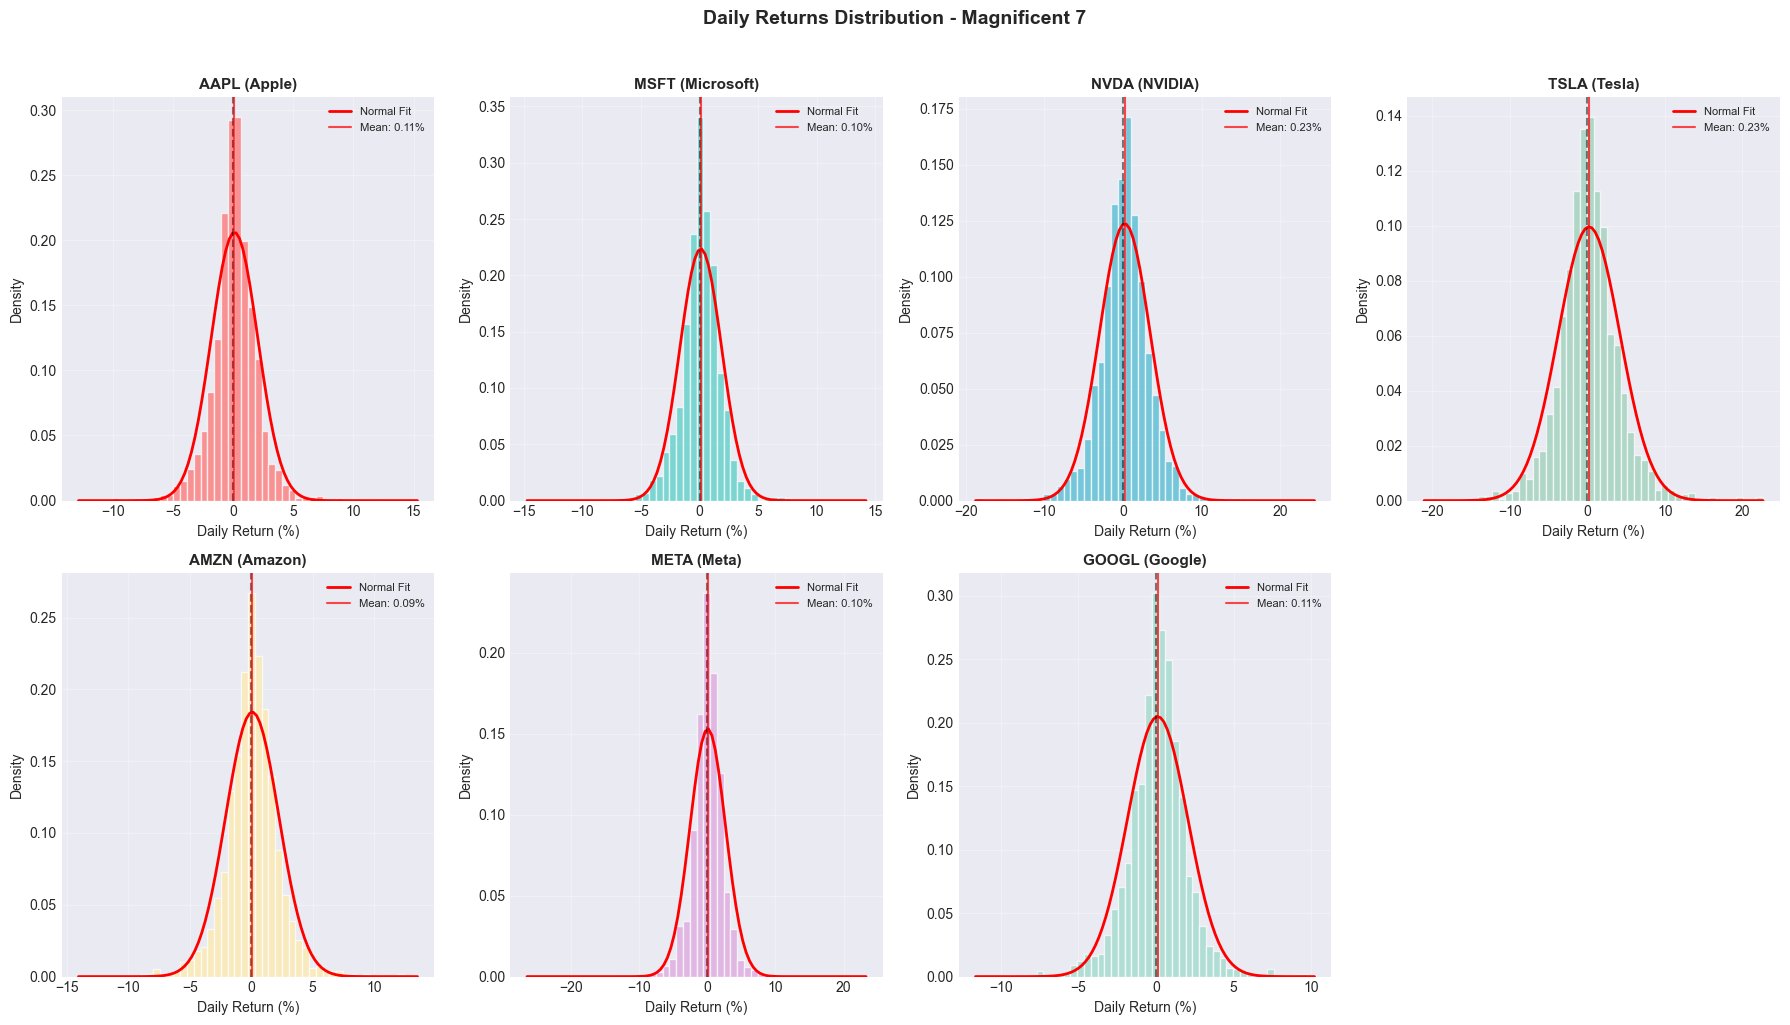

📊 Saved: data/processed/returns_distribution.png


In [9]:
# Distribution of daily returns
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']

for i, ticker in enumerate(TICKERS):
    ax = axes[i]
    returns = daily_returns[ticker] * 100
    
    # Histogram with KDE
    ax.hist(returns, bins=50, density=True, alpha=0.7, color=colors[i], edgecolor='white')
    
    # Fit normal distribution
    mu, std = returns.mean(), returns.std()
    x = np.linspace(returns.min(), returns.max(), 100)
    ax.plot(x, stats.norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal Fit')
    
    ax.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    ax.axvline(x=mu, color='red', linestyle='-', alpha=0.7, label=f'Mean: {mu:.2f}%')
    
    ax.set_title(f'{ticker} ({MAGNIFICENT_7[ticker]})', fontsize=11, fontweight='bold')
    ax.set_xlabel('Daily Return (%)')
    ax.set_ylabel('Density')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Hide the 8th subplot
axes[7].axis('off')

plt.suptitle('Daily Returns Distribution - Magnificent 7', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../data/processed/returns_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("📊 Saved: data/processed/returns_distribution.png")

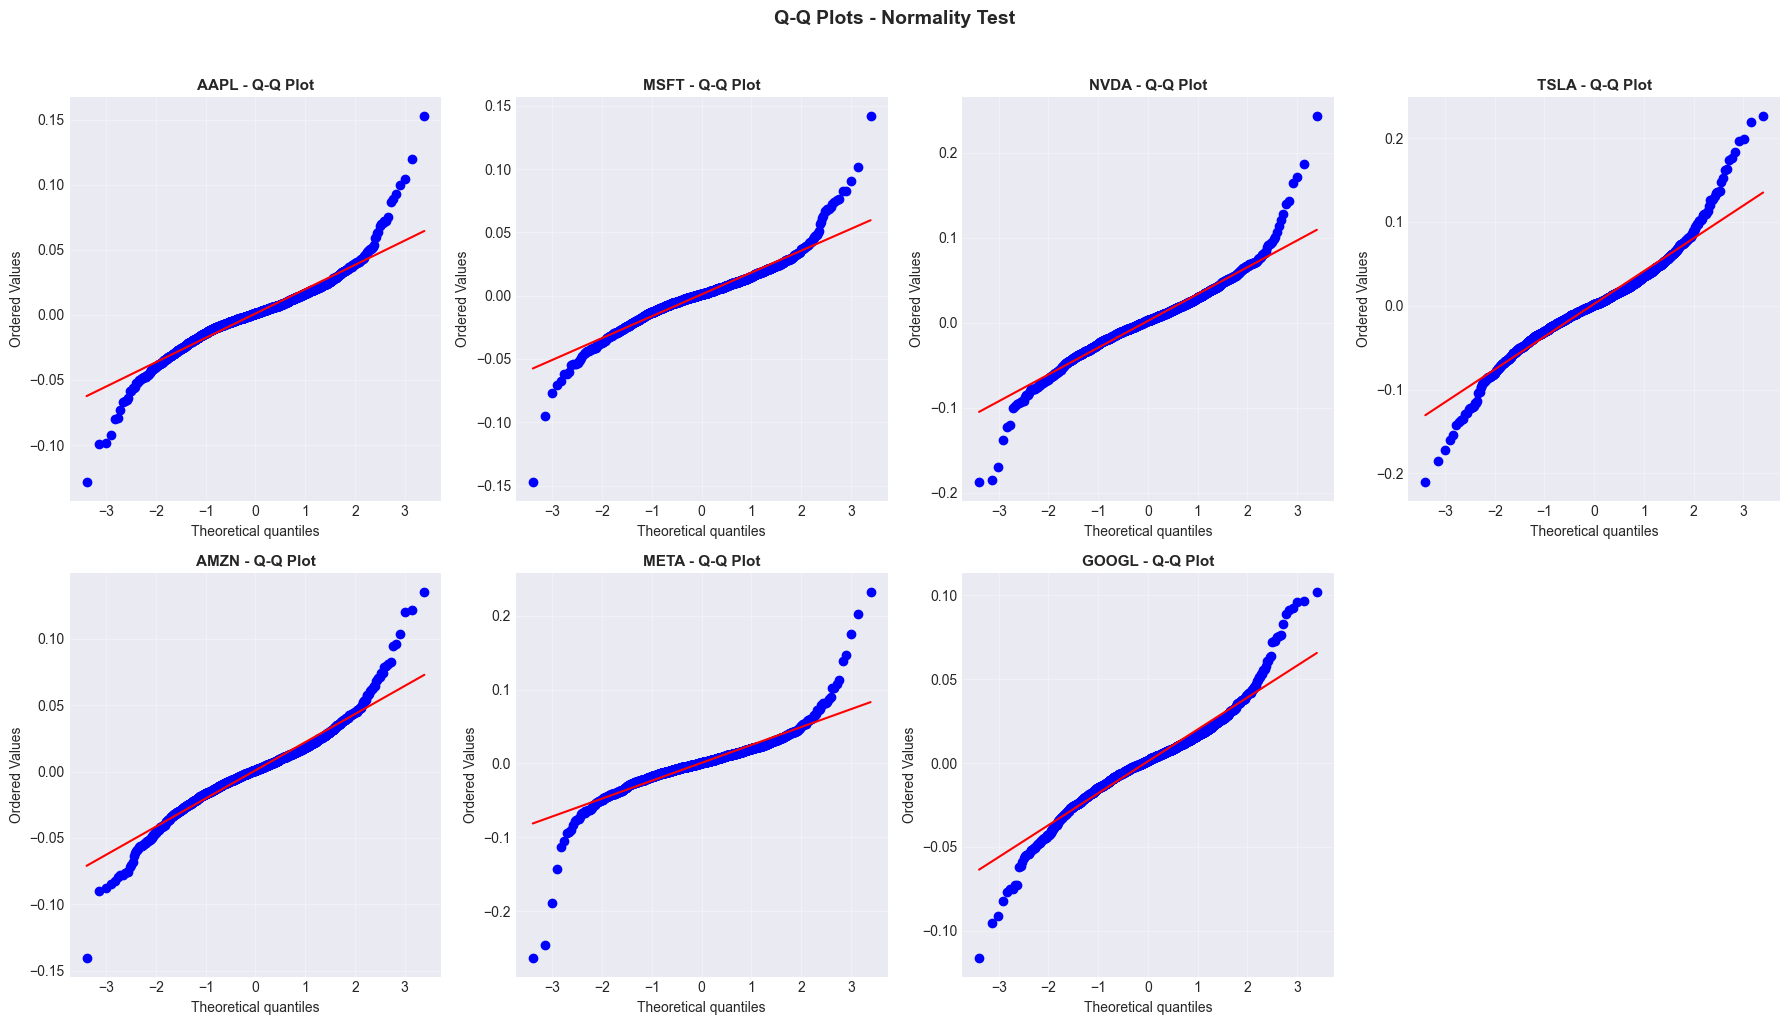


📊 Shapiro-Wilk Normality Test
(p-value < 0.05 means NOT normally distributed)

AAPL: p-value = 0.000000 ❌ NOT Normal
MSFT: p-value = 0.000000 ❌ NOT Normal
NVDA: p-value = 0.000000 ❌ NOT Normal
TSLA: p-value = 0.000000 ❌ NOT Normal
AMZN: p-value = 0.000000 ❌ NOT Normal
META: p-value = 0.000000 ❌ NOT Normal
GOOGL: p-value = 0.000000 ❌ NOT Normal


In [10]:
# QQ Plot - Test for normality
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, ticker in enumerate(TICKERS):
    ax = axes[i]
    returns = daily_returns[ticker].dropna()
    
    stats.probplot(returns, dist="norm", plot=ax)
    ax.set_title(f'{ticker} - Q-Q Plot', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)

axes[7].axis('off')

plt.suptitle('Q-Q Plots - Normality Test', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
print("\n📊 Shapiro-Wilk Normality Test")
print("=" * 50)
print("(p-value < 0.05 means NOT normally distributed)\n")

for ticker in TICKERS:
    stat, p_value = stats.shapiro(daily_returns[ticker].dropna()[:500])  # Use subset for large data
    result = "❌ NOT Normal" if p_value < 0.05 else "✅ Normal"
    print(f"{ticker}: p-value = {p_value:.6f} {result}")

## 2.5 Correlation Analysis

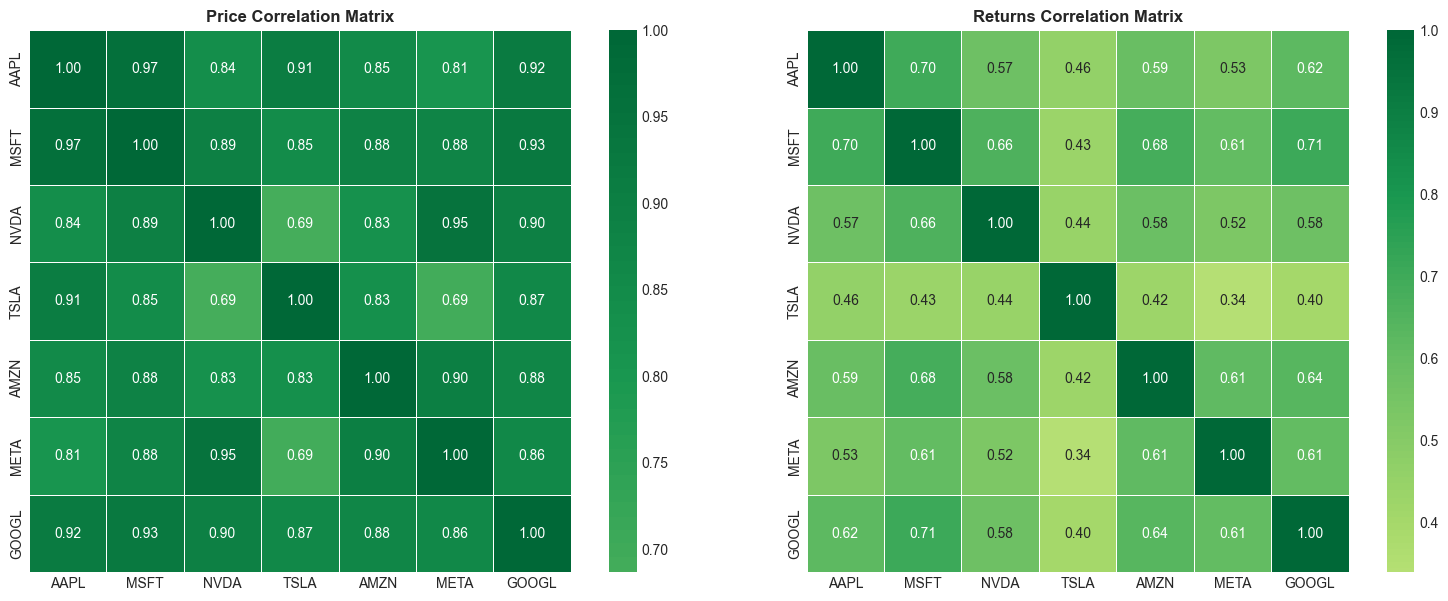

📊 Saved: data/processed/correlation_matrix.png


In [11]:
# Correlation matrix - Price levels
price_corr = close_prices.corr()

# Correlation matrix - Returns (more meaningful)
returns_corr = daily_returns.corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Price correlation
sns.heatmap(price_corr, annot=True, cmap='RdYlGn', center=0, 
            fmt='.2f', ax=axes[0], square=True, linewidths=0.5,
            annot_kws={'size': 10})
axes[0].set_title('Price Correlation Matrix', fontsize=12, fontweight='bold')

# Returns correlation
sns.heatmap(returns_corr, annot=True, cmap='RdYlGn', center=0, 
            fmt='.2f', ax=axes[1], square=True, linewidths=0.5,
            annot_kws={'size': 10})
axes[1].set_title('Returns Correlation Matrix', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("📊 Saved: data/processed/correlation_matrix.png")

In [12]:
# Correlation with market indices
# Merge returns with indices
indices_returns = df_indices.pct_change().dropna()

# Align dates
combined = pd.concat([daily_returns, indices_returns], axis=1).dropna()

# Correlation with S&P 500
print("📊 Correlation with Market Indices")
print("=" * 50)

market_corr = []
for ticker in TICKERS:
    market_corr.append({
        'Ticker': ticker,
        'S&P 500 (GSPC)': combined[ticker].corr(combined['GSPC']),
        'NASDAQ (IXIC)': combined[ticker].corr(combined['IXIC']),
        'VIX': combined[ticker].corr(combined['VIX'])
    })

df_market_corr = pd.DataFrame(market_corr).set_index('Ticker')
df_market_corr.round(4)

📊 Correlation with Market Indices


,S&P 500 (GSPC),NASDAQ (IXIC),VIX
Ticker,,,
AAPL,0.7728,0.8091,-0.5445
MSFT,0.8121,0.8547,-0.5724
NVDA,0.6959,0.7866,-0.5285
TSLA,0.5020,0.5840,-0.3816
AMZN,0.6704,0.7713,-0.4985
META,0.6230,0.6958,-0.4349
GOOGL,0.7303,0.7830,-0.5403


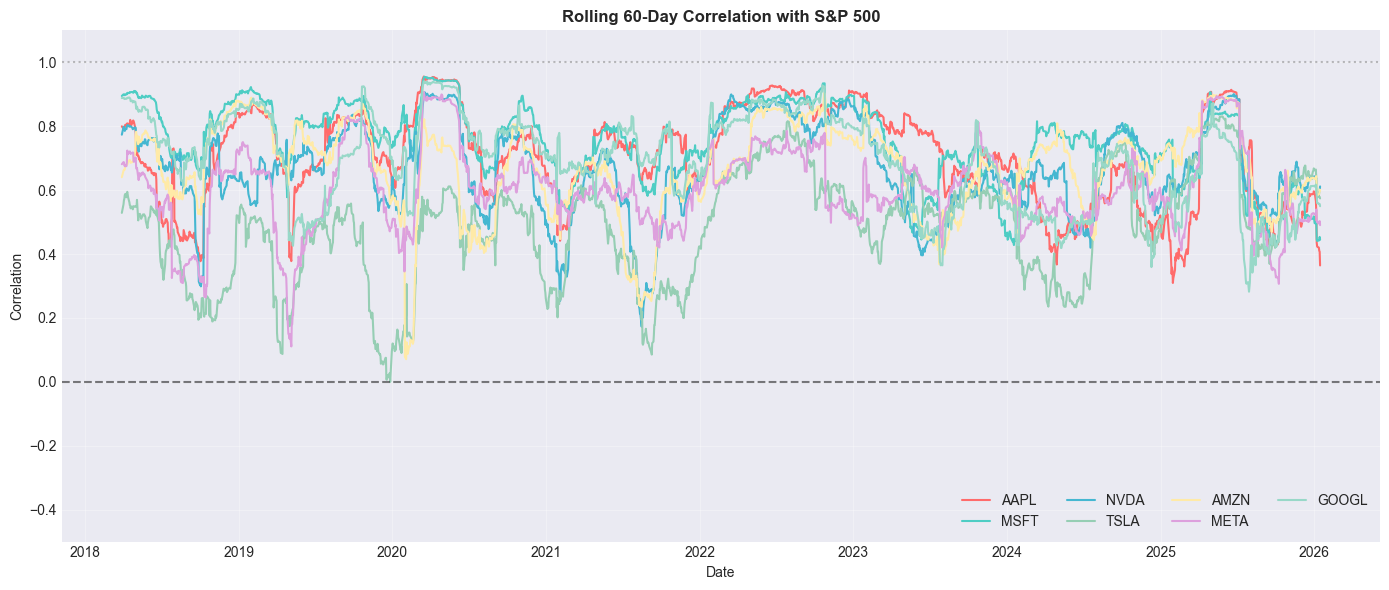

In [13]:
# Rolling correlation (60-day window)
fig, ax = plt.subplots(figsize=(14, 6))

window = 60
for i, ticker in enumerate(TICKERS):
    rolling_corr = combined[ticker].rolling(window=window).corr(combined['GSPC'])
    ax.plot(rolling_corr.index, rolling_corr, label=ticker, linewidth=1.5, color=colors[i])

ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax.axhline(y=1, color='gray', linestyle=':', alpha=0.5)
ax.set_title(f'Rolling {window}-Day Correlation with S&P 500', fontsize=12, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Correlation')
ax.legend(loc='lower right', ncol=4)
ax.grid(True, alpha=0.3)
ax.set_ylim(-0.5, 1.1)

plt.tight_layout()
plt.show()

## 2.6 Volatility Analysis

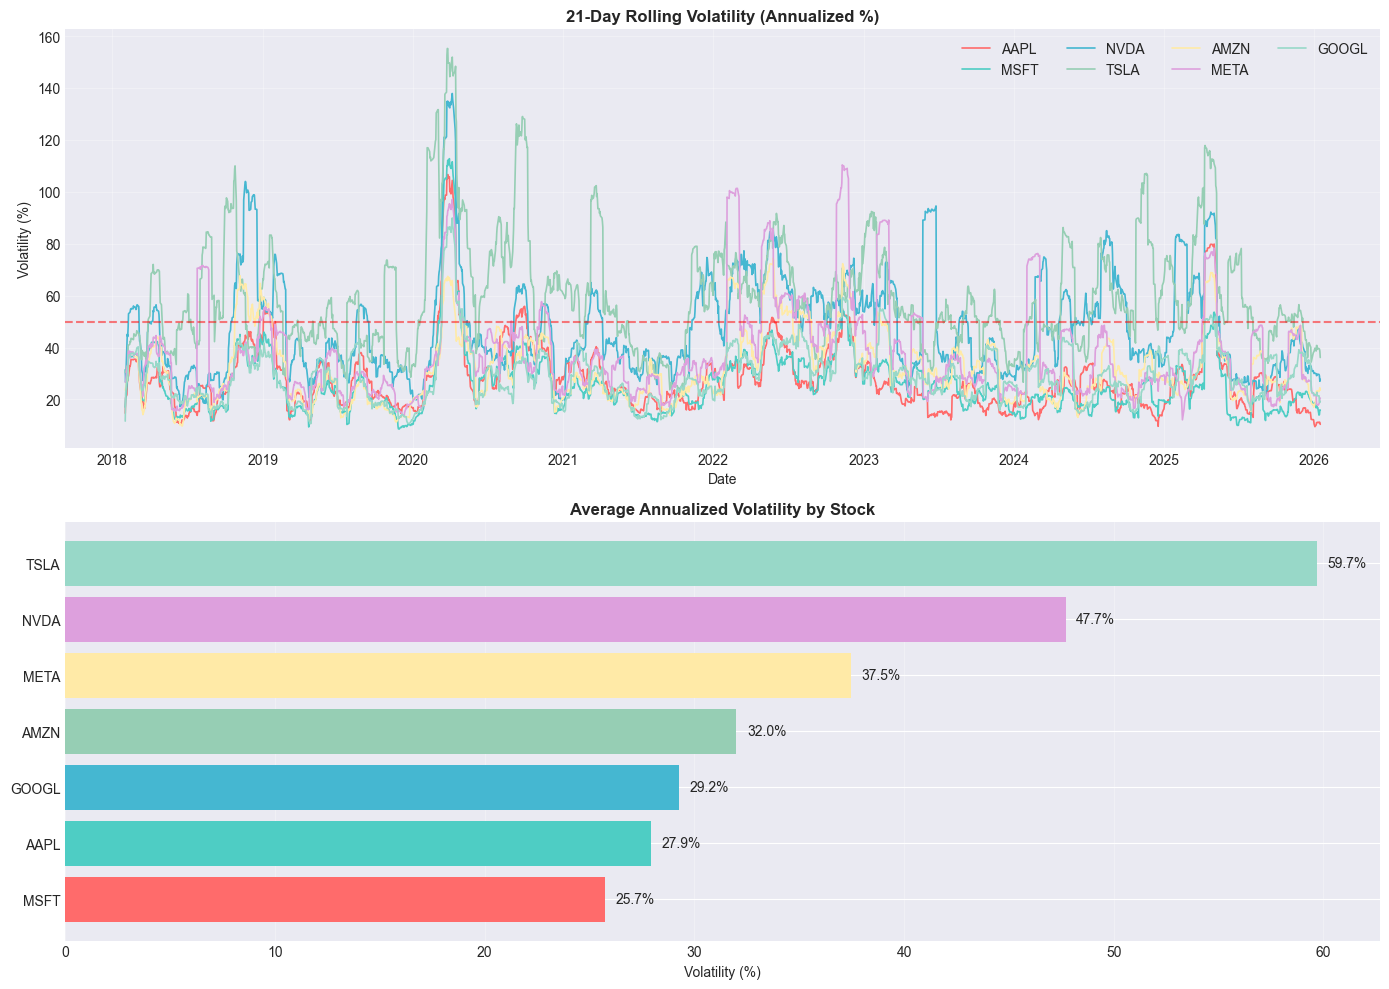

📊 Saved: data/processed/volatility_analysis.png


In [14]:
# Calculate rolling volatility (21-day = 1 month)
rolling_vol = daily_returns.rolling(window=21).std() * np.sqrt(252) * 100  # Annualized

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Rolling volatility
ax1 = axes[0]
for i, ticker in enumerate(TICKERS):
    ax1.plot(rolling_vol.index, rolling_vol[ticker], label=ticker, linewidth=1.2, color=colors[i])

ax1.set_title('21-Day Rolling Volatility (Annualized %)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility (%)')
ax1.legend(loc='upper right', ncol=4)
ax1.grid(True, alpha=0.3)

# Highlight high volatility periods
ax1.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='High Vol Threshold')

# Plot 2: Average volatility comparison
ax2 = axes[1]
avg_vol = rolling_vol.mean().sort_values(ascending=True)
bars = ax2.barh(avg_vol.index, avg_vol.values, color=colors[:len(avg_vol)])
ax2.set_title('Average Annualized Volatility by Stock', fontsize=12, fontweight='bold')
ax2.set_xlabel('Volatility (%)')

for bar, vol in zip(bars, avg_vol.values):
    ax2.text(vol + 0.5, bar.get_y() + bar.get_height()/2, f'{vol:.1f}%', va='center', fontsize=10)

ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../data/processed/volatility_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("📊 Saved: data/processed/volatility_analysis.png")

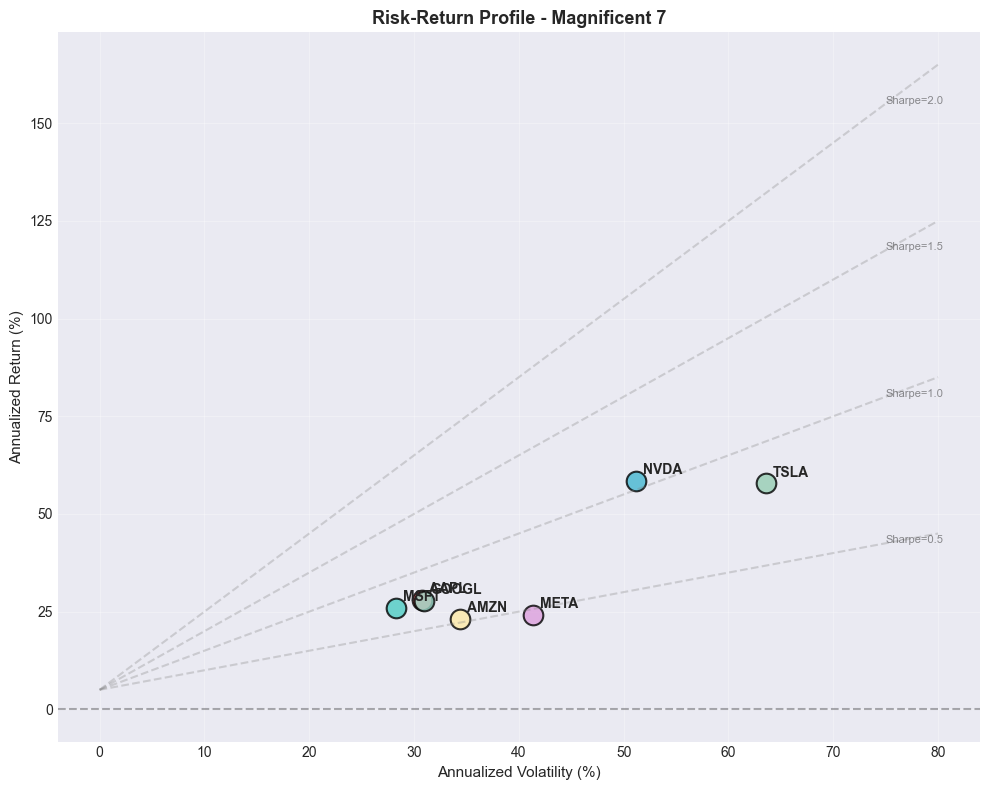

In [15]:
# Risk-Return Scatter Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Annualized return and volatility
ann_return = (daily_returns.mean() * 252 * 100)
ann_vol = (daily_returns.std() * np.sqrt(252) * 100)

for i, ticker in enumerate(TICKERS):
    ax.scatter(ann_vol[ticker], ann_return[ticker], s=200, c=colors[i], 
               label=f"{ticker}", edgecolors='black', linewidth=1.5, alpha=0.8)
    ax.annotate(ticker, (ann_vol[ticker], ann_return[ticker]), 
                xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

ax.set_xlabel('Annualized Volatility (%)', fontsize=11)
ax.set_ylabel('Annualized Return (%)', fontsize=11)
ax.set_title('Risk-Return Profile - Magnificent 7', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)

# Add Sharpe ratio contours (assuming 5% risk-free rate)
rf = 5
for sharpe in [0.5, 1.0, 1.5, 2.0]:
    x = np.linspace(0, 80, 100)
    y = rf + sharpe * x
    ax.plot(x, y, '--', color='gray', alpha=0.3)
    ax.annotate(f'Sharpe={sharpe}', (75, rf + sharpe * 75), fontsize=8, alpha=0.5)

plt.tight_layout()
plt.show()

## 2.7 Seasonality Analysis

In [16]:
# Add time-based features
returns_with_time = daily_returns.copy()
returns_with_time['year'] = returns_with_time.index.year
returns_with_time['month'] = returns_with_time.index.month
returns_with_time['day_of_week'] = returns_with_time.index.dayofweek
returns_with_time['quarter'] = returns_with_time.index.quarter

# Day of week names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

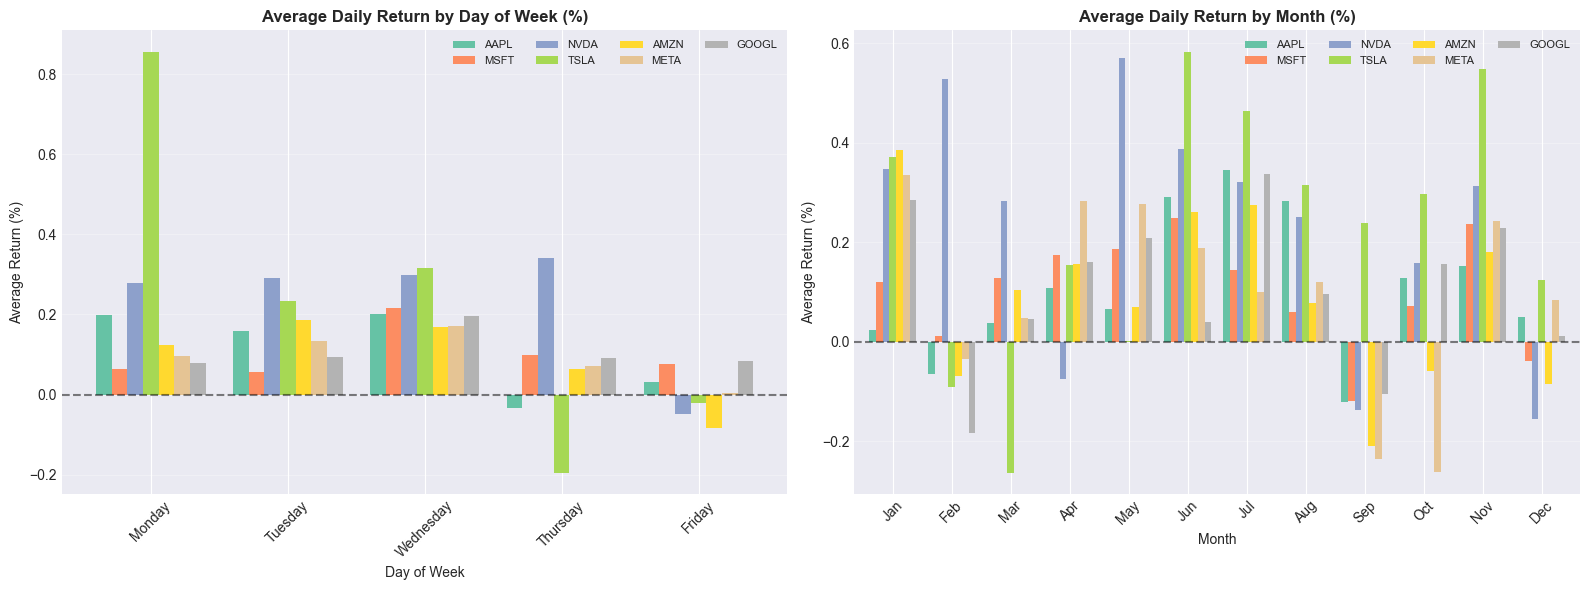

📊 Saved: data/processed/seasonality_analysis.png


In [17]:
# Average returns by day of week
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Day of week effect
ax1 = axes[0]
dow_returns = returns_with_time.groupby('day_of_week')[TICKERS].mean() * 100
dow_returns.index = day_names
dow_returns.plot(kind='bar', ax=ax1, width=0.8, colormap='Set2')
ax1.set_title('Average Daily Return by Day of Week (%)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Average Return (%)')
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.legend(loc='upper right', ncol=4, fontsize=8)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Monthly effect
ax2 = axes[1]
monthly_returns = returns_with_time.groupby('month')[TICKERS].mean() * 100
monthly_returns.index = month_names
monthly_returns.plot(kind='bar', ax=ax2, width=0.8, colormap='Set2')
ax2.set_title('Average Daily Return by Month (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Return (%)')
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.legend(loc='upper right', ncol=4, fontsize=8)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../data/processed/seasonality_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("📊 Saved: data/processed/seasonality_analysis.png")

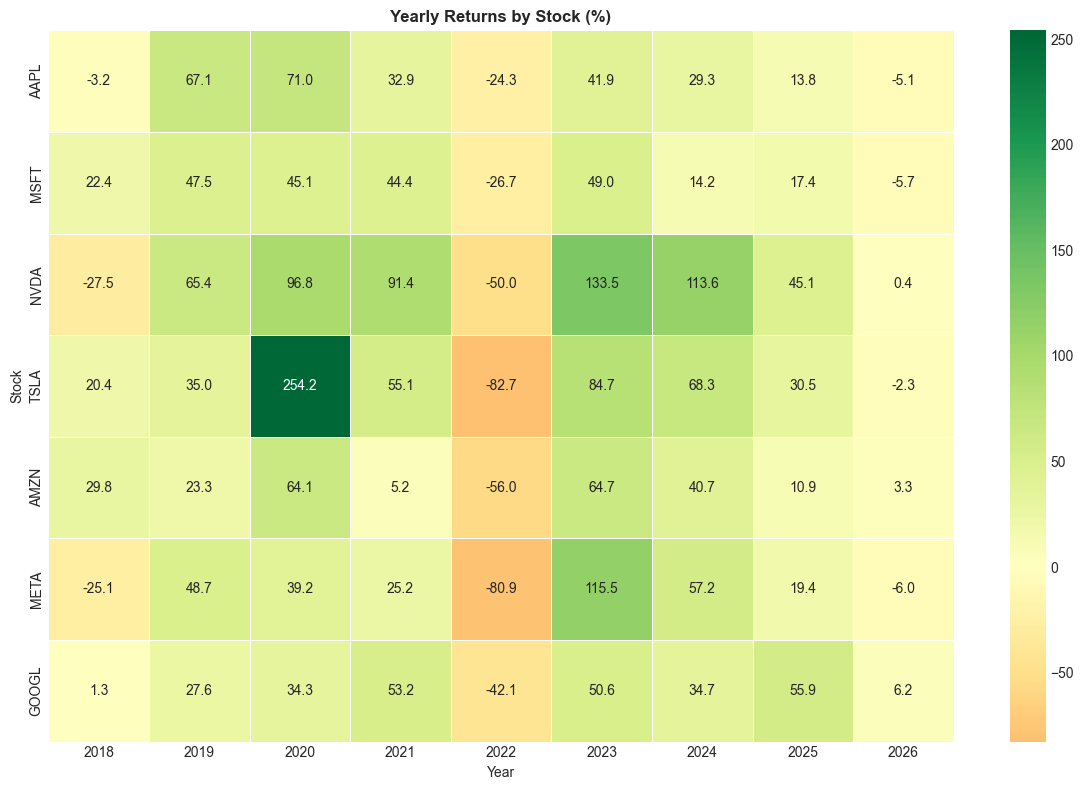

In [18]:
# Yearly performance heatmap
yearly_returns = returns_with_time.groupby('year')[TICKERS].sum() * 100

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(yearly_returns.T, annot=True, fmt='.1f', cmap='RdYlGn', center=0,
            linewidths=0.5, ax=ax, annot_kws={'size': 10})
ax.set_title('Yearly Returns by Stock (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Stock')

plt.tight_layout()
plt.show()

## 2.8 Outlier Detection

In [19]:
# Identify extreme return days (> 3 standard deviations)
def detect_outliers(returns, n_std=3):
    """Detect outliers using z-score method."""
    outliers = {}
    
    for ticker in returns.columns:
        mean = returns[ticker].mean()
        std = returns[ticker].std()
        threshold = n_std * std
        
        mask = abs(returns[ticker] - mean) > threshold
        outlier_dates = returns[mask].index
        outlier_values = returns.loc[mask, ticker] * 100
        
        outliers[ticker] = pd.DataFrame({
            'Date': outlier_dates,
            'Return (%)': outlier_values.values
        })
    
    return outliers

outliers = detect_outliers(daily_returns)

print("🔍 Extreme Return Days (> 3 Std Dev)")
print("=" * 50)
for ticker in TICKERS:
    n = len(outliers[ticker])
    print(f"{ticker}: {n} extreme days")

🔍 Extreme Return Days (> 3 Std Dev)
AAPL: 29 extreme days
MSFT: 31 extreme days
NVDA: 21 extreme days
TSLA: 36 extreme days
AMZN: 30 extreme days
META: 27 extreme days
GOOGL: 29 extreme days


In [20]:
# Show top 10 most extreme days across all stocks
all_outliers = []
for ticker in TICKERS:
    df = outliers[ticker].copy()
    df['Ticker'] = ticker
    all_outliers.append(df)

df_outliers = pd.concat(all_outliers)
df_outliers['Abs Return'] = df_outliers['Return (%)'].abs()
df_outliers = df_outliers.sort_values('Abs Return', ascending=False)

print("\n🔥 Top 15 Most Extreme Return Days")
print("=" * 60)
df_outliers[['Date', 'Ticker', 'Return (%)']].head(15)


🔥 Top 15 Most Extreme Return Days


,Date,Ticker,Return (%)
12,2022-02-03,META,-26.3901
16,2022-10-27,META,-24.5571
14,2023-05-25,NVDA,24.3696
18,2023-02-02,META,23.2824
34,2025-04-09,TSLA,22.6900
31,2024-10-24,TSLA,21.9190
20,2020-09-08,TSLA,-21.0628
20,2024-02-02,META,20.3176
7,2020-02-03,TSLA,19.8949
22,2021-03-09,TSLA,19.6412


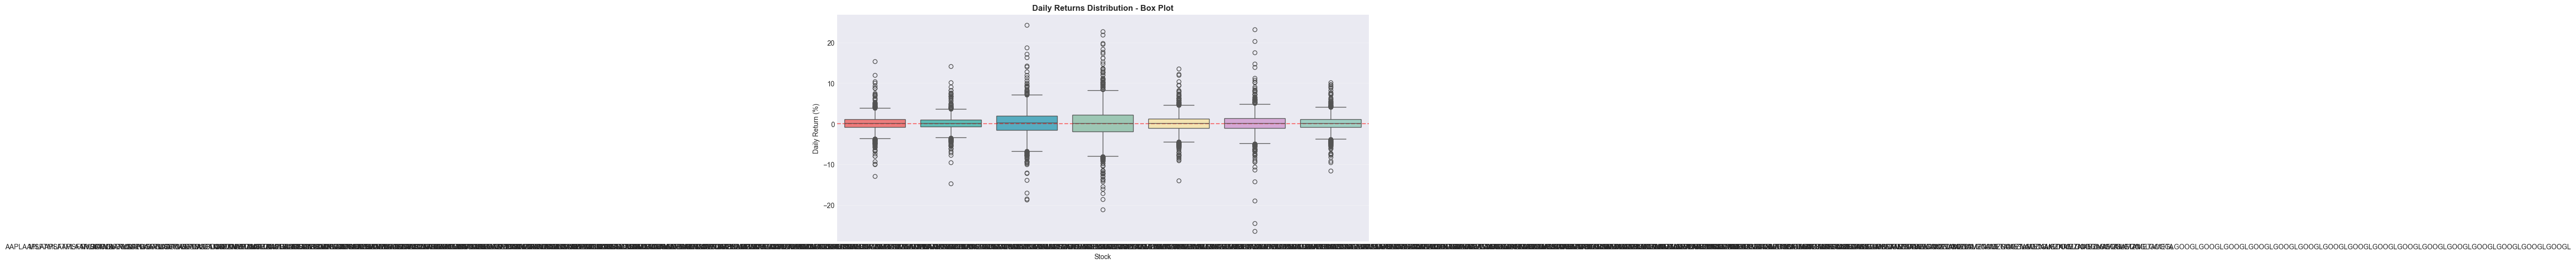

📊 Saved: data/processed/boxplot_returns.png


In [21]:
# Box plots for returns
fig, ax = plt.subplots(figsize=(14, 6))

returns_melted = daily_returns.melt(var_name='Ticker', value_name='Return') * 100
sns.boxplot(data=returns_melted, x='Ticker', y='Return', palette=colors, ax=ax)

ax.set_title('Daily Returns Distribution - Box Plot', fontsize=12, fontweight='bold')
ax.set_xlabel('Stock')
ax.set_ylabel('Daily Return (%)')
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../data/processed/boxplot_returns.png', dpi=150, bbox_inches='tight')
plt.show()

print("📊 Saved: data/processed/boxplot_returns.png")

## 2.9 Volume Analysis

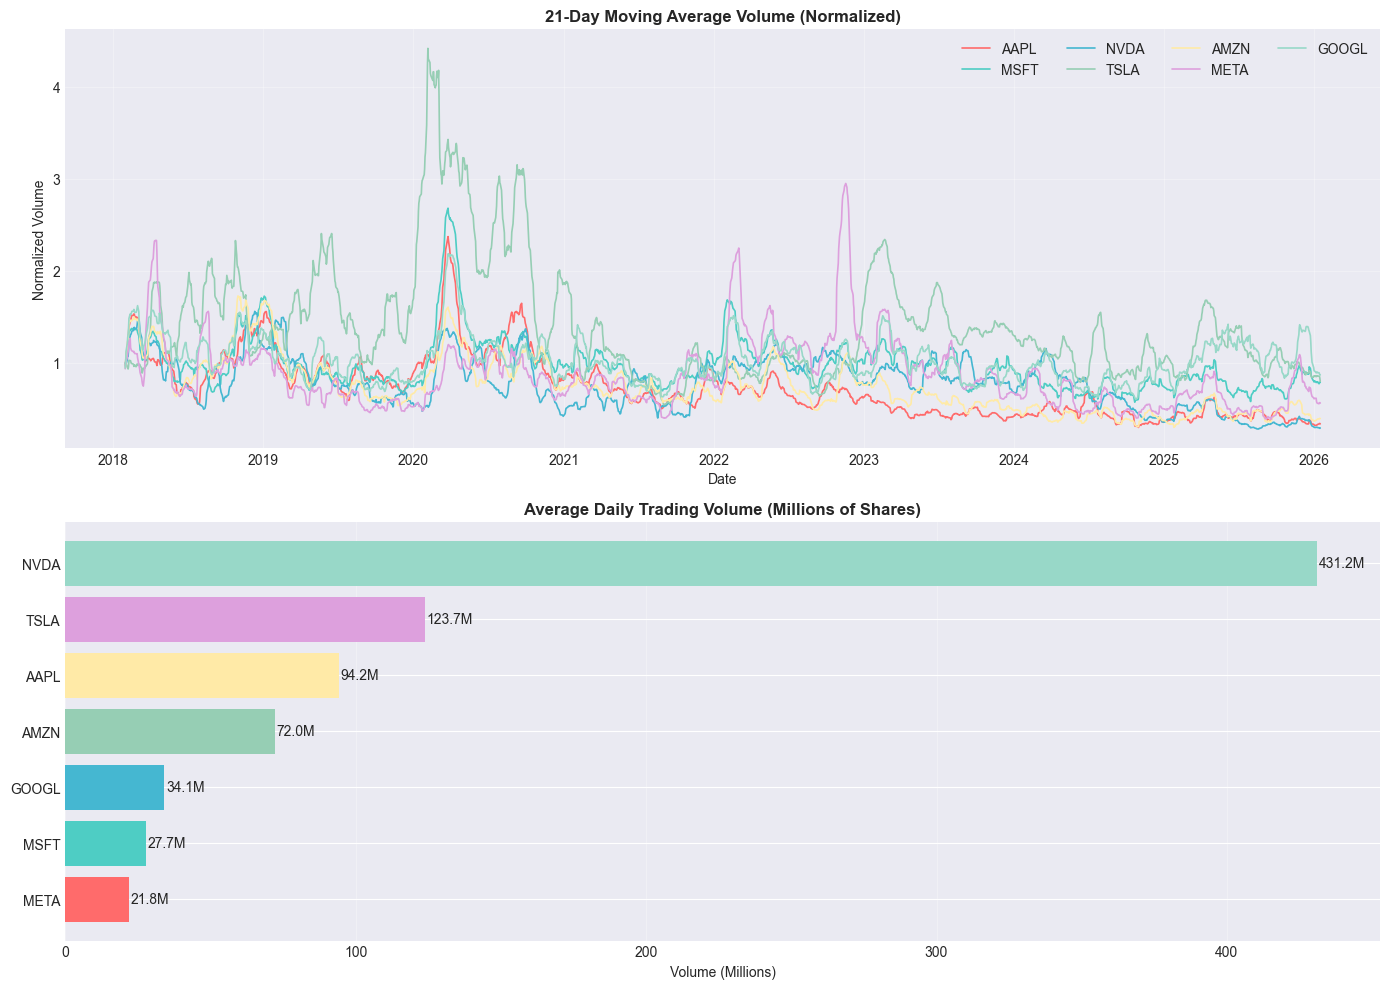

In [22]:
# Create volume DataFrame
volume_data = pd.DataFrame()
for ticker in TICKERS:
    volume_data[ticker] = stock_data[ticker]['volume']

# Rolling average volume
volume_ma = volume_data.rolling(window=21).mean()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Normalized volume (to compare)
ax1 = axes[0]
volume_normalized = volume_ma / volume_ma.iloc[21]  # Base = first valid value
for i, ticker in enumerate(TICKERS):
    ax1.plot(volume_normalized.index, volume_normalized[ticker], 
             label=ticker, linewidth=1.2, color=colors[i])
ax1.set_title('21-Day Moving Average Volume (Normalized)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Volume')
ax1.legend(loc='upper right', ncol=4)
ax1.grid(True, alpha=0.3)

# Average daily volume ($ millions)
ax2 = axes[1]
avg_volume = volume_data.mean().sort_values(ascending=True) / 1e6
bars = ax2.barh(avg_volume.index, avg_volume.values, color=colors[:len(avg_volume)])
ax2.set_title('Average Daily Trading Volume (Millions of Shares)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Volume (Millions)')

for bar, vol in zip(bars, avg_volume.values):
    ax2.text(vol + 0.5, bar.get_y() + bar.get_height()/2, f'{vol:.1f}M', va='center', fontsize=10)

ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## 2.10 EDA Summary

In [23]:
# Create summary report
print("=" * 70)
print("📊 EXPLORATORY DATA ANALYSIS SUMMARY")
print("=" * 70)

print("\n🎯 KEY FINDINGS:\n")

print("1️⃣ DATA QUALITY:")
print(f"   • All 7 stocks have {len(close_prices)} trading days")
print(f"   • No missing values detected")
print(f"   • Date range: {close_prices.index.min().strftime('%Y-%m-%d')} to {close_prices.index.max().strftime('%Y-%m-%d')}")

print("\n2️⃣ RETURNS DISTRIBUTION:")
print(f"   • All stocks show NON-NORMAL distributions (fat tails)")
print(f"   • Highest average daily return: {(daily_returns.mean() * 100).idxmax()} ({daily_returns.mean().max() * 100:.3f}%)")
print(f"   • Most volatile: {(daily_returns.std() * 100).idxmax()} ({daily_returns.std().max() * 100:.3f}% daily std)")

print("\n3️⃣ CORRELATIONS:")
print(f"   • Highest correlation pair: {returns_corr.unstack().drop_duplicates().sort_values(ascending=False).index[1]}")
print(f"   • All stocks positively correlated with S&P 500")
print(f"   • VIX shows NEGATIVE correlation (fear index)")

print("\n4️⃣ VOLATILITY:")
avg_vol_sorted = rolling_vol.mean().sort_values(ascending=False)
print(f"   • Most volatile: {avg_vol_sorted.index[0]} ({avg_vol_sorted.iloc[0]:.1f}% annualized)")
print(f"   • Least volatile: {avg_vol_sorted.index[-1]} ({avg_vol_sorted.iloc[-1]:.1f}% annualized)")

print("\n5️⃣ RISK-ADJUSTED RETURNS (Sharpe Ratio):")
sharpe = advanced_stats['Sharpe Ratio'].sort_values(ascending=False)
for ticker in sharpe.index:
    print(f"   • {ticker}: {sharpe[ticker]:.3f}")

print("\n6️⃣ EXTREME EVENTS:")
total_outliers = sum(len(outliers[t]) for t in TICKERS)
print(f"   • Total extreme days (>3 std): {total_outliers}")
print(f"   • Largest single-day drop: {df_outliers['Return (%)'].min():.2f}%")
print(f"   • Largest single-day gain: {df_outliers['Return (%)'].max():.2f}%")

print("\n" + "=" * 70)
print("✅ EDA Complete! Continue with 03_cleaning.ipynb")
print("=" * 70)

📊 EXPLORATORY DATA ANALYSIS SUMMARY

🎯 KEY FINDINGS:

1️⃣ DATA QUALITY:
   • All 7 stocks have 2021 trading days
   • No missing values detected
   • Date range: 2018-01-02 to 2026-01-15

2️⃣ RETURNS DISTRIBUTION:
   • All stocks show NON-NORMAL distributions (fat tails)
   • Highest average daily return: NVDA (0.232%)
   • Most volatile: TSLA (4.004% daily std)

3️⃣ CORRELATIONS:
   • Highest correlation pair: ('MSFT', 'GOOGL')
   • All stocks positively correlated with S&P 500
   • VIX shows NEGATIVE correlation (fear index)

4️⃣ VOLATILITY:
   • Most volatile: TSLA (59.7% annualized)
   • Least volatile: MSFT (25.7% annualized)

5️⃣ RISK-ADJUSTED RETURNS (Sharpe Ratio):
   • NVDA: 1.143
   • MSFT: 0.914
   • TSLA: 0.910
   • AAPL: 0.907
   • GOOGL: 0.894
   • AMZN: 0.675
   • META: 0.582

6️⃣ EXTREME EVENTS:
   • Total extreme days (>3 std): 203
   • Largest single-day drop: -26.39%
   • Largest single-day gain: 24.37%

✅ EDA Complete! Continue with 03_cleaning.ipynb


In [24]:
# Save EDA results
eda_results = {
    'advanced_stats': advanced_stats.to_dict(),
    'returns_correlation': returns_corr.to_dict(),
    'market_correlation': df_market_corr.to_dict(),
    'average_volatility': rolling_vol.mean().to_dict(),
    'outlier_counts': {t: len(outliers[t]) for t in TICKERS}
}

with open('../data/processed/eda_results.json', 'w') as f:
    json.dump(eda_results, f, indent=2, default=str)

# Save daily returns for next step
daily_returns.to_csv('../data/processed/daily_returns.csv')

print("💾 Saved: data/processed/eda_results.json")
print("💾 Saved: data/processed/daily_returns.csv")

💾 Saved: data/processed/eda_results.json
💾 Saved: data/processed/daily_returns.csv
